# Multiple Linear Regression
## Bike Sharing Case Study

**Problem Statement**: A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

**Solution**: They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [604]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [605]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [606]:
# reading the data
data = pd.read_csv("day.csv")

In [607]:
# Check the head of the dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


data.shape

In [609]:
#statiscal value
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [610]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### From above information we can say:
- Data Types are not in correct format
- There are no missing values in the dataframe
- Instant Column is like serial number and it will not help in data analysis
- Dteday Column information is already extracted and thus we would not need that columns
- Season, Year, Month, Holiday, weekday, workingday and weathersit Column is not in binary encoding. For visualization, convert int datatype to object data

In [612]:
#Dropping 'Instant' and 'dteday'
data.drop(['instant'],axis=1,inplace=True)
data.drop(['dteday'],axis=1,inplace=True)

In [613]:
#Converting season column to get meaningful information
data['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)

In [614]:
#Converting yr column to get meaningful information
data['yr'].replace({0:'2018',1:'2019'},inplace=True)

In [615]:
#Converting month column to get meaningful information
data['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'},inplace=True)

In [616]:
#Converting Holiday column to get meaningful information
data['holiday'].replace({0:'No Holiday',1:'Holiday'},inplace=True)

In [617]:
#Converting weekday column to get meaningful information
data['weekday'].replace({0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'},inplace=True)

In [618]:
#Converting workingday column to get meaningful information
data['workingday'].replace({0:'workingday',1:'Holiday_w'},inplace=True)

In [619]:
#Converting weathersit column to get meaningful information
data['weathersit'].replace({1:'Clear',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'},inplace=True)

In [620]:
# Recheck the head of the dataset
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,No Holiday,Sun,workingday,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,No Holiday,Mon,workingday,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,No Holiday,Tue,Holiday_w,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,No Holiday,Wed,Holiday_w,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,No Holiday,Thurs,Holiday_w,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Visualising the Data

Let's **understand the data**.
- Scatter Plot of all the numerical variable
- Boxplot of all the categorical vairbales
- Co-relations of all the variables against each other

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

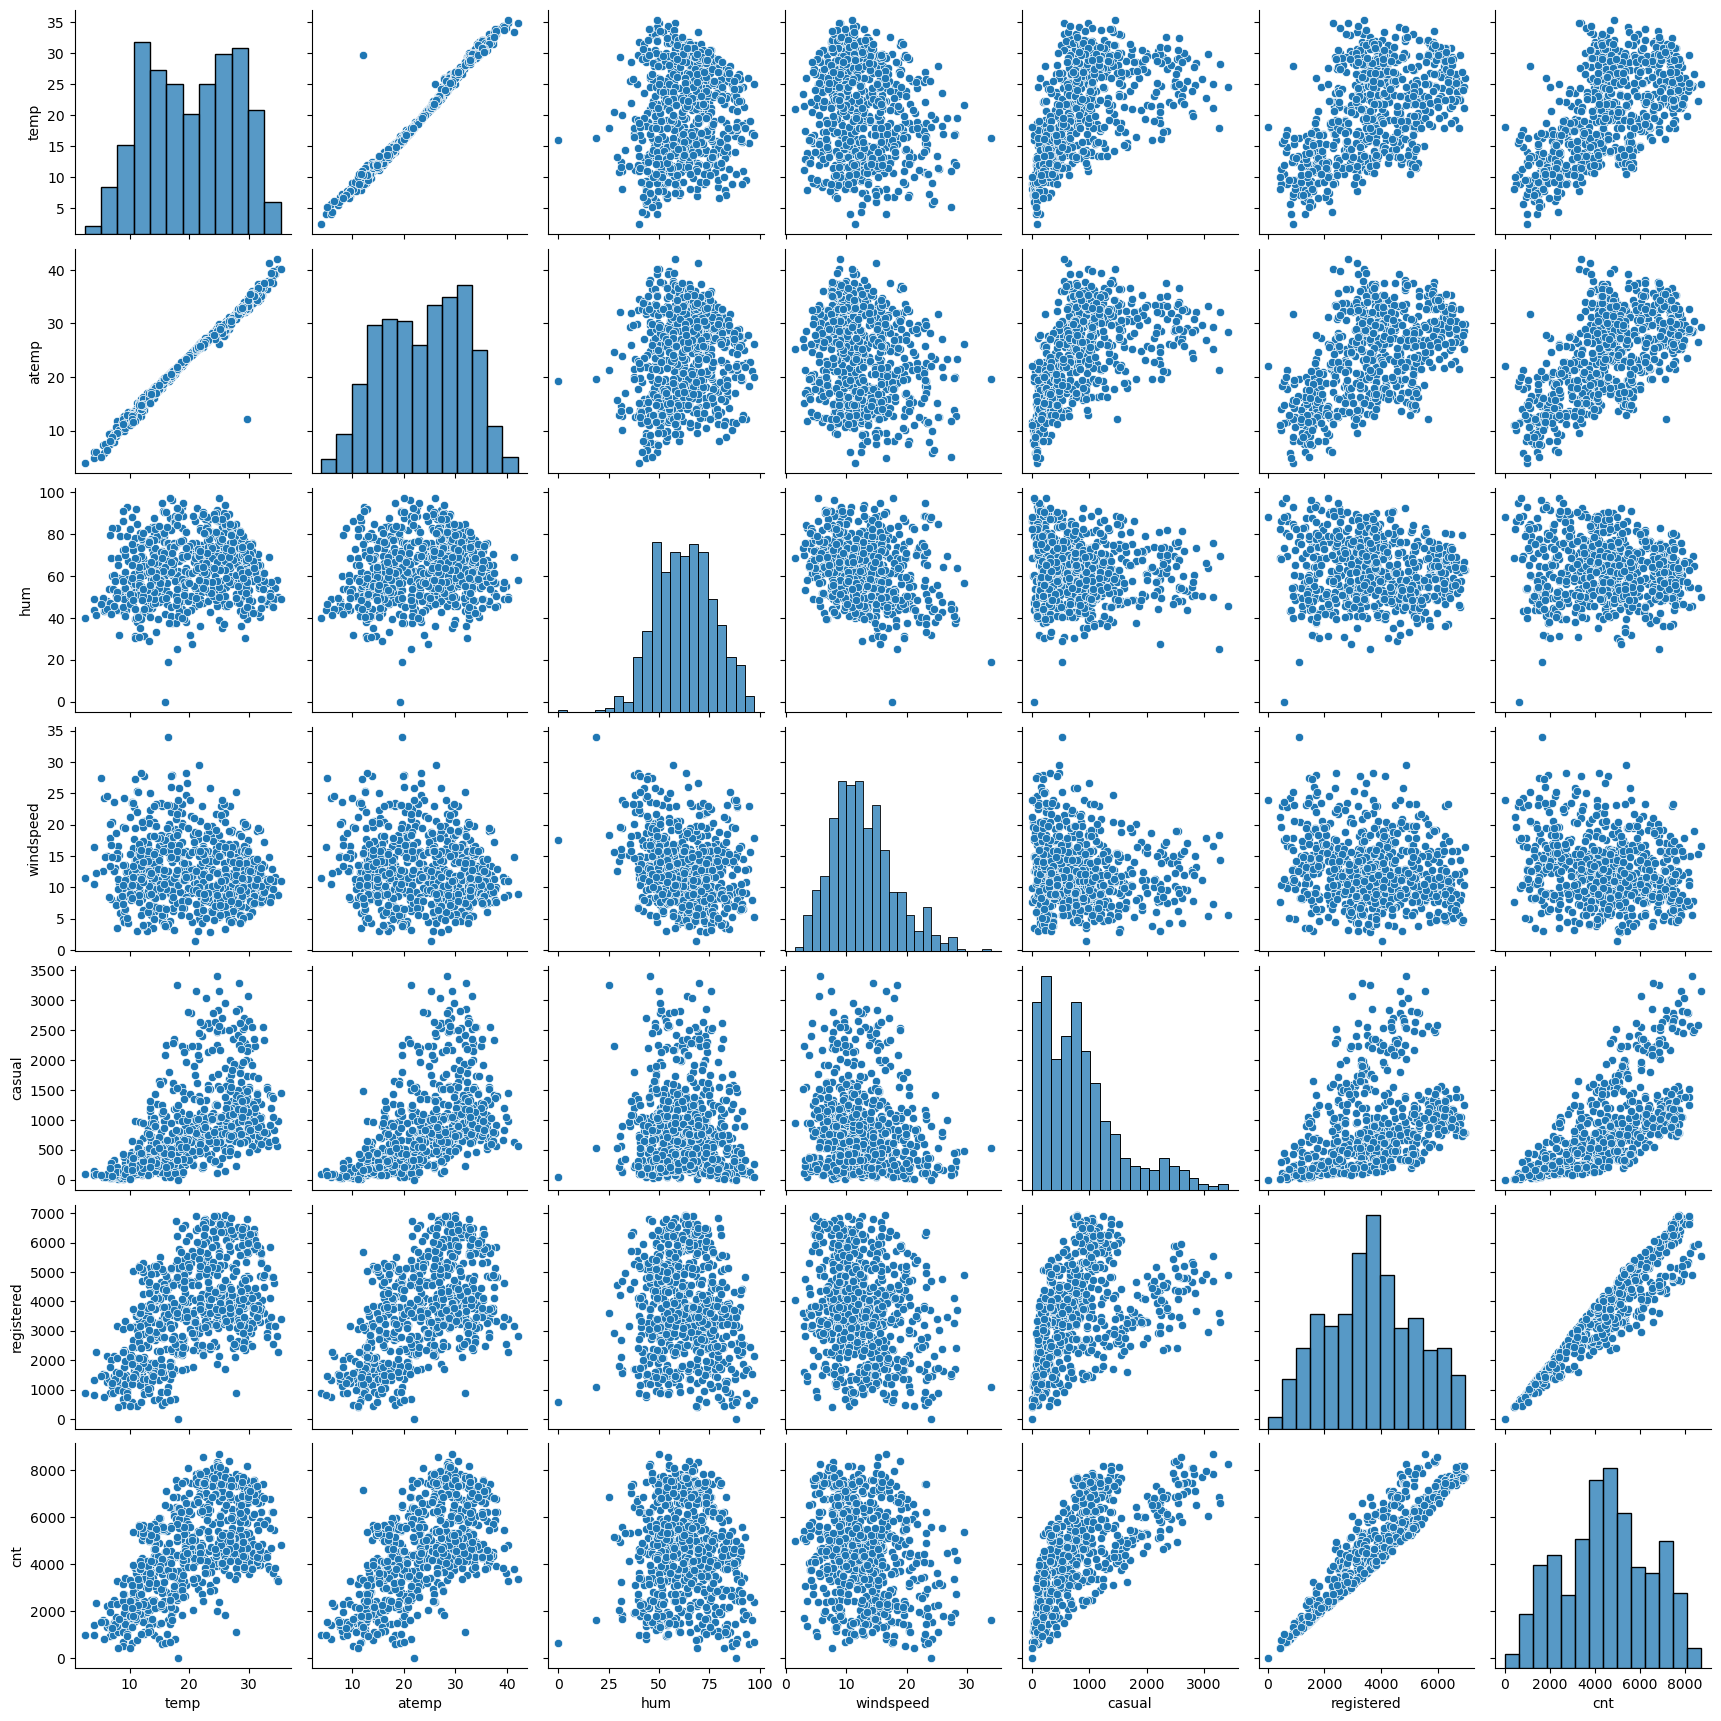

In [623]:
#visualising the numerical variables
sns.pairplot(data)
plt.show()

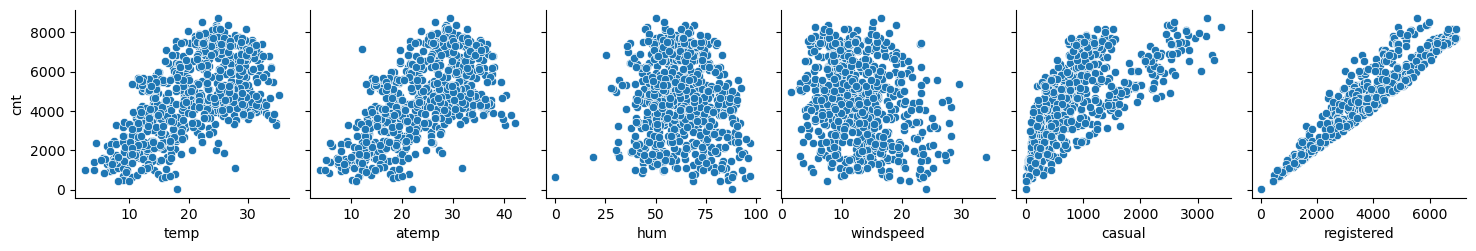

In [624]:
#visualising the numerical variables with count
sns.pairplot(data, x_vars=['temp','atemp','hum','windspeed','casual','registered'], y_vars=['cnt'])
plt.show()

#### Visualising Categorical Variables

There are a few categorical variables as well. Boxplot for some of these variables.

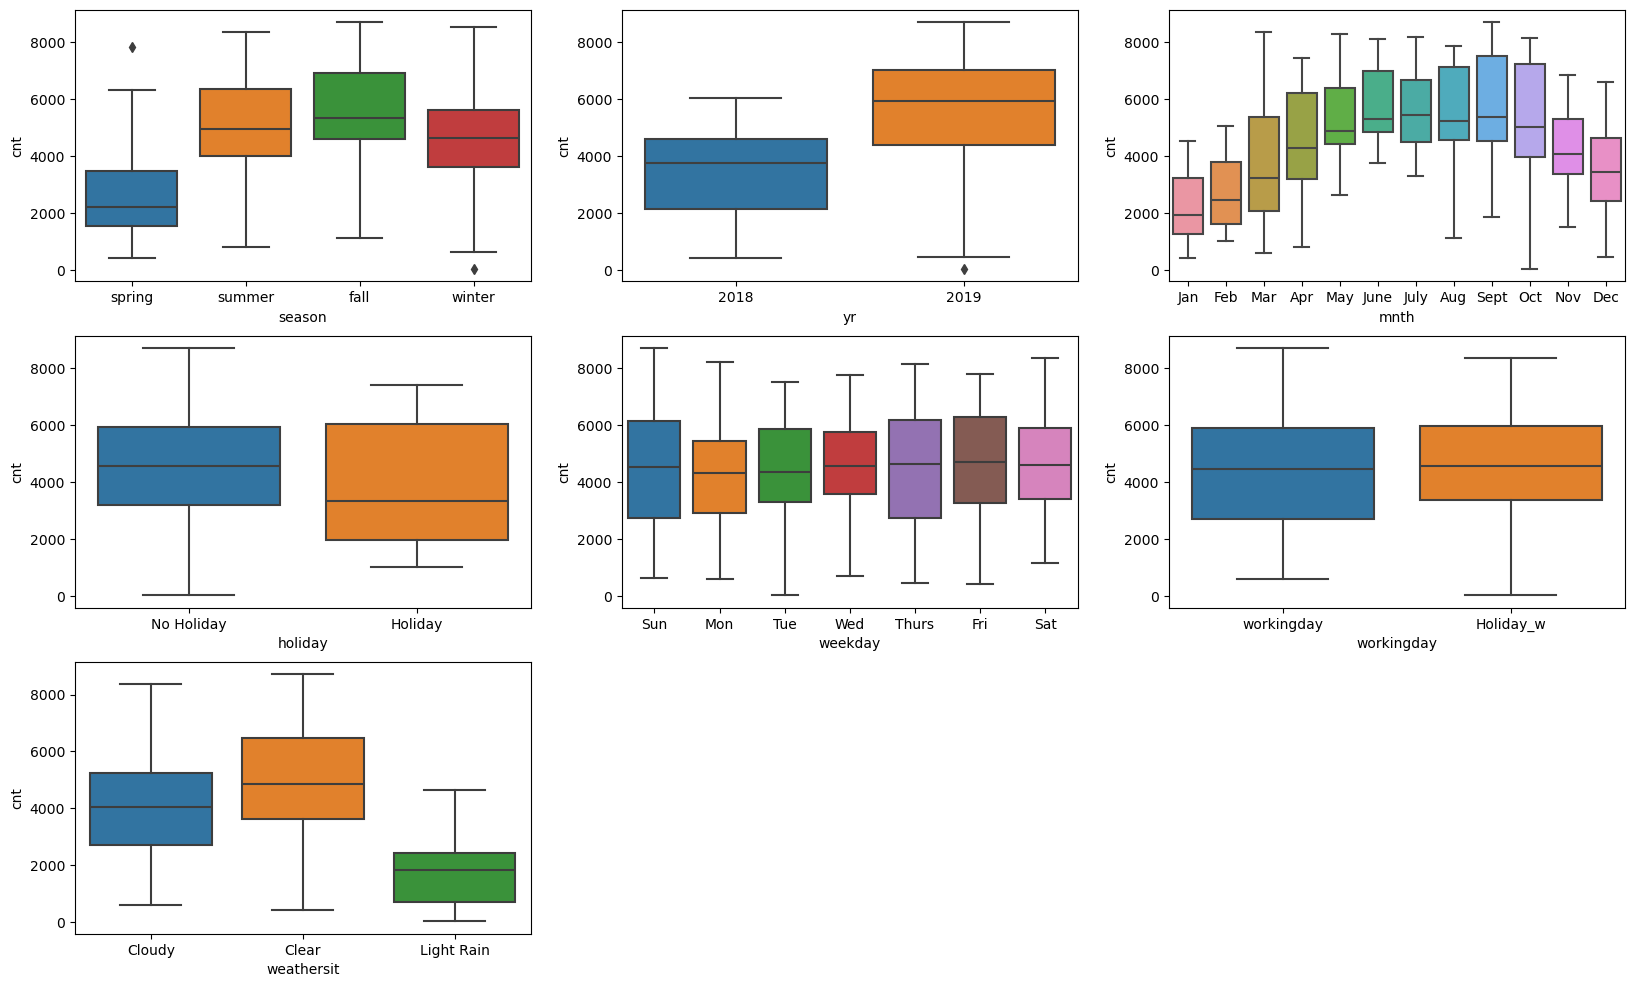

In [626]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

## Step 3: Data Preparation

- Create the dummy variables for all the categorical variables
- Splitting the data into test and trainning set
- Re-scaling the variables

In [629]:
#variable counts
data.value_counts()

season  yr    mnth  holiday     weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt 
fall    2018  Aug   No Holiday  Fri      Holiday_w   Clear       29.178347  33.11290  65.4583  15.624936  639     3166        3805    1
summer  2019  Apr   No Holiday  Thurs    Holiday_w   Clear       19.543347  23.51585  42.7917  7.959064   655     5541        6196    1
                                                     Cloudy      18.996653  22.85190  56.9167  11.250104  347     4020        4367    1
                                Tue      Holiday_w   Clear       17.790433  21.37565  50.4348  20.913313  1208    4728        5936    1
                                                                 20.055847  23.83190  31.7500  23.999132  905     4680        5585    1
                                                                                                                                     ..
spring  2018  Jan   No Holiday  Sun      workingday  

In [630]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,No Holiday,Sun,workingday,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,No Holiday,Mon,workingday,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,No Holiday,Tue,Holiday_w,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,No Holiday,Wed,Holiday_w,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,No Holiday,Thurs,Holiday_w,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dummy Variables

The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [633]:
# 1. Convert the categorical data into dummy variables and Create new dataframe to store them
status=pd.get_dummies(data[['yr','holiday','workingday','season','mnth','weekday','weathersit']],drop_first=True)
status.head()

,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
1,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
2,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [634]:
# Add the results to the original dataframe

final=pd.concat([data,status],axis=1)
final.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,spring,2018,Jan,No Holiday,Sun,workingday,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
1,spring,2018,Jan,No Holiday,Mon,workingday,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
2,spring,2018,Jan,No Holiday,Tue,Holiday_w,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,spring,2018,Jan,No Holiday,Wed,Holiday_w,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,spring,2018,Jan,No Holiday,Thurs,Holiday_w,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [635]:
# Let's drop the column for those dummy variables have been created

final=final.drop(['season','yr','holiday','mnth','workingday','weekday','weathersit'],axis=1)
final.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,14.110847,18.18125,80.5833,10.749882,331,654,985,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
1,14.902598,17.68695,69.6087,16.652113,131,670,801,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


## Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [637]:
# Import libraries to train and test split
import sklearn
from sklearn.model_selection import train_test_split

In [638]:
# Create df_train and df_test split from the dataframe and check their shape
df_train,df_test=train_test_split(final,train_size=0.7,random_state=100)

In [639]:
print(df_test.shape)

(220, 32)


In [640]:
print(df_train.shape)

(510, 32)


### Rescaling the Features 
There are two common ways of rescaling:

1. Min-Max scaling (normalization)
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [642]:
# Import libraries to scale the variables
from sklearn.preprocessing import MinMaxScaler

In [643]:
scaler = MinMaxScaler()

In [644]:
# Apply scaler() to all the columns
var_scale=['temp','atemp','hum','windspeed','casual','registered','cnt']

In [645]:
# Scale all the numeric variables
df_train[var_scale]=scaler.fit_transform(df_train[var_scale]) 
df_train.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
576,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
426,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,True,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False
728,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
482,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
111,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False


In [646]:
df_train.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


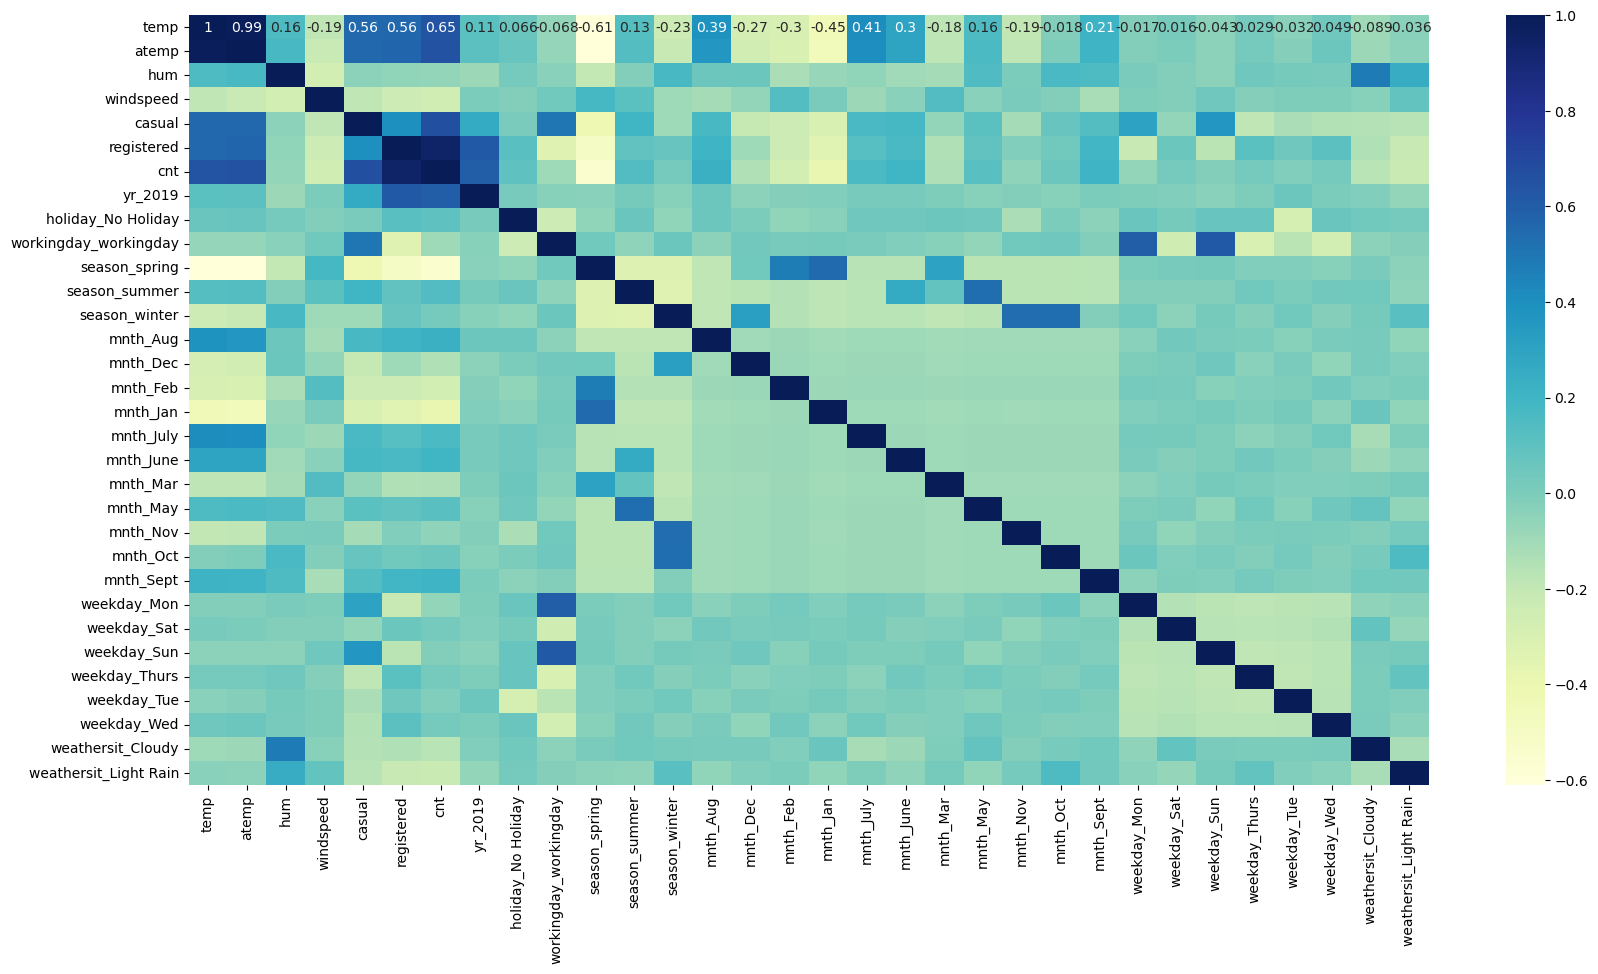

In [647]:
# Plot the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

### Dividing into X and Y sets for the model building

In [649]:
# Split df_train further into X_train and y_train
y_train=df_train.pop('cnt')
X_train=df_train

In [650]:
# Creating a model with all the variables
import statsmodels.api as sm

# Add a constant
X_train_xm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train.astype(float), X_train_xm.astype(float)).fit()

lr_2.params
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.072e+30
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        23:44:43   Log-Likelihood:                 16965.
No. Observations:                 510   AIC:                        -3.387e+04
Df Residuals:                     479   BIC:                        -3.374e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.667e-16   4.28e-16     -1.324      0.186   -1.41e-15    2.74e-16
temp                   -2.44e-15   1.45e-15     -1.683      0.093   -5.29e-15    4.08e-16
atemp                  1.624e-15    1.4e-15      1.163      0.246   -1.12e-15    4.37e-15
hum                    7.235e-16   3.95e-16      1.831      0.068    -5.3e-17     1.5e-15
windspeed              3.392e-16    2.8e-16      1.213      0.226    -2.1e-16    8.89e-16
casual                    0.3775   4.07e-16   9.28e+14      0.000       0.377       0.377
registered                0.7968   4.83e-16   1.65e+15      0.000       0.797       0.797
yr_2019               -2.731e-16   1.43e-16     -1.912      0.056   -5.54e-16    7.49e-18
holiday_No Holiday     2.363e-16   1.91e-16      1.237      0.217   -1.39e-16    6.12e-16
workingday_workingday  1.337e-16   1.63e-16      0.818      0.414   -1.87e-16    4.55e-16
season_spring          -3.46e-16   3.03e-16     -1.140      0.255   -9.42e-16     2.5e-16
season_summer         -5.095e-16   2.66e-16     -1.918      0.056   -1.03e-15    1.24e-17
season_winter          6.485e-17   2.89e-16      0.224      0.823   -5.03e-16    6.33e-16
mnth_Aug              -5.735e-16   3.42e-16     -1.677      0.094   -1.25e-15    9.84e-17
mnth_Dec              -1.089e-16    3.4e-16     -0.320      0.749   -7.77e-16    5.59e-16
mnth_Feb                4.97e-16   3.33e-16      1.493      0.136   -1.57e-16    1.15e-15
mnth_Jan               5.739e-16    3.4e-16      1.688      0.092    -9.4e-17    1.24e-15
mnth_July             -1.714e-16   3.54e-16     -0.484      0.628   -8.67e-16    5.24e-16
mnth_June             -2.487e-16   2.53e-16     -0.983      0.326   -7.46e-16    2.49e-16
mnth_Mar               3.677e-16   2.48e-16      1.484      0.139   -1.19e-16    8.55e-16
mnth_May               -6.92e-17   2.14e-16     -0.323      0.747    -4.9e-16    3.52e-16
mnth_Nov               8.188e-17   3.67e-16      0.223      0.824    -6.4e-16    8.04e-16
mnth_Oct              -4.131e-17   3.63e-16     -0.114      0.909   -7.54e-16    6.72e-16
mnth_Sept             -4.325e-16   3.25e-16     -1.330      0.184   -1.07e-15    2.07e-16
weekday_Mon             3.68e-16   1.99e-16      1.847      0.065   -2.34e-17    7.59e-16
weekday_Sat            1.018e-16   1.59e-16      0.642      0.521    -2.1e-16    4.13e-16
weekday_Sun            3.201e-16   1.95e-16      1.645      0.101   -6.23e-17    7.02e-16
weekday_Thurs          -7.12e-17   1.48e-16     -0.480      0.631   -3.62e-16     2.2e-16
weekday_Tue            1.824e-16   1.53e-16      1.193      0.233   -1.18e-16    4.83e-16
weekday_Wed            2.631e-17   1.56e-16      0.169      0.866   -2.79e-16    3.32e-16
weathersit_Cloudy      1.957e-16   1.09e-16      1.799      0.073    -1.8e-17    4.09e-16
weathersit_Light Rain  

In [651]:
# Import the Variance Inflation library 

from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame() 
X = X_train 
vif['Features'] = X.columns 
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])] 
vif['VIF'] = round(vif['VIF'], 2) 
vif = vif.sort_values(by="VIF", ascending=False) 
vif

,Features,VIF
7,holiday_No Holiday,145.87
0,temp,68.41
8,workingday_workingday,60.00
1,atemp,56.19
25,weekday_Sun,35.11
23,weekday_Mon,33.11
9,season_spring,10.84
11,season_winter,9.95
10,season_summer,8.40
5,registered,7.74


##### Holiday No_Holiday has the highest VIF with a very high P-value too. As this variable is being captured by weekends, weekdays and other variables and it's p-value suggests that it is statistically it is not useful for our model. Thus we can delete this sub-category. 

In [653]:
# Drop Holiday_No Holiday
X=X.drop('holiday_No Holiday',axis=1,inplace=True)

In [654]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_5 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.506e+30
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        23:44:43   Log-Likelihood:                 17052.
No. Observations:                 510   AIC:                        -3.404e+04
Df Residuals:                     479   BIC:                        -3.391e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.894e-16   4.08e-16     -1.444      0.149   -1.39e-15    2.13e-16
temp                    1.42e-15   1.22e-15      1.161      0.246   -9.83e-16    3.82e-15
atemp                 -1.719e-15   1.18e-15     -1.459      0.145   -4.03e-15    5.96e-16
hum                    9.432e-16   3.33e-16      2.829      0.005    2.88e-16     1.6e-15
windspeed              1.053e-16   2.36e-16      0.446      0.655   -3.58e-16    5.69e-16
casual                    0.3775   3.43e-16    1.1e+15      0.000       0.377       0.377
registered                0.7968   4.08e-16   1.95e+15      0.000       0.797       0.797
yr_2019               -1.791e-17    1.2e-16     -0.149      0.882   -2.55e-16    2.19e-16
workingday_workingday -1.837e-16   2.42e-16     -0.759      0.448   -6.59e-16    2.92e-16
season_spring           -8.1e-17   2.56e-16     -0.316      0.752   -5.84e-16    4.22e-16
season_summer          2.439e-16   2.24e-16      1.088      0.277   -1.96e-16    6.84e-16
season_winter          1.237e-16   2.44e-16      0.507      0.612   -3.56e-16    6.03e-16
mnth_Aug               2.782e-17   2.89e-16      0.096      0.923   -5.39e-16    5.95e-16
mnth_Dec              -1.784e-17   2.87e-16     -0.062      0.950   -5.81e-16    5.46e-16
mnth_Feb               3.185e-17   2.81e-16      0.113      0.910    -5.2e-16    5.84e-16
mnth_Jan               3.598e-17   2.87e-16      0.125      0.900   -5.28e-16       6e-16
mnth_July              1.336e-16   2.99e-16      0.447      0.655   -4.53e-16     7.2e-16
mnth_June               6.46e-17   2.14e-16      0.303      0.762   -3.55e-16    4.84e-16
mnth_Mar              -4.961e-17   2.09e-16     -0.237      0.813   -4.61e-16    3.61e-16
mnth_May              -1.566e-16   1.81e-16     -0.866      0.387   -5.12e-16    1.99e-16
mnth_Nov               6.544e-18    3.1e-16      0.021      0.983   -6.03e-16    6.16e-16
mnth_Oct              -1.361e-16   3.06e-16     -0.444      0.657   -7.38e-16    4.66e-16
mnth_Sept             -1.636e-16   2.74e-16     -0.596      0.551   -7.03e-16    3.76e-16
weekday_Mon            1.586e-16    2.6e-16      0.611      0.542   -3.52e-16    6.69e-16
weekday_Sat           -2.391e-16   1.34e-16     -1.787      0.075   -5.02e-16    2.38e-17
weekday_Sun           -6.101e-17   2.61e-16     -0.234      0.815   -5.73e-16    4.51e-16
weekday_Thurs         -4.578e-17   1.25e-16     -0.366      0.714   -2.91e-16       2e-16
weekday_Tue           -9.702e-17   1.29e-16     -0.752      0.452   -3.51e-16    1.56e-16
weekday_Wed           -3.421e-17   1.31e-16     -0.261      0.794   -2.92e-16    2.24e-16
weathersit_Cloudy      6.711e-17   9.18e-17      0.731      0.465   -1.13e-16    2.47e-16
weathersit_Light Rain -1.653e-16   2.47e-16     -0.669      0.504   -6.51e-16     3.2e-16
=======================

In [655]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,451.32
1,atemp,384.77
5,registered,41.65
2,hum,38.75
7,workingday_workingday,16.88
10,season_winter,12.94
8,season_spring,11.98
4,casual,11.30
24,weekday_Sun,9.38
22,weekday_Mon,8.57


##### Working Working day has a high VIF of 16 and it's p-value of 0.448 too and I think it is redundant because same information is being captured by Weekdays working day and a very high p-value which states that the variable is not important for our model. Thus, they are pretty co-related.

In [657]:
# Drop Holiday_No Holiday
X=X.drop('workingday_workingday',axis=1,inplace=True)

In [658]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_6 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.433e+29
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        23:44:44   Log-Likelihood:                 16782.
No. Observations:                 510   AIC:                        -3.350e+04
Df Residuals:                     480   BIC:                        -3.338e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.028e-16   6.88e-16      0.876      0.381   -7.49e-16    1.95e-15
temp                   2.314e-15   2.07e-15      1.120      0.263   -1.74e-15    6.37e-15
atemp                 -2.089e-15   1.99e-15     -1.048      0.295   -6.01e-15    1.83e-15
hum                   -9.527e-17   5.64e-16     -0.169      0.866    -1.2e-15    1.01e-15
windspeed             -1.966e-17   3.99e-16     -0.049      0.961   -8.04e-16    7.65e-16
casual                    0.3775   5.66e-16   6.67e+14      0.000       0.377       0.377
registered                0.7968   6.56e-16   1.21e+15      0.000       0.797       0.797
yr_2019                1.772e-16      2e-16      0.885      0.377   -2.16e-16    5.71e-16
season_spring          4.928e-16   4.34e-16      1.137      0.256   -3.59e-16    1.34e-15
season_summer          1.596e-16   3.79e-16      0.421      0.674   -5.86e-16    9.05e-16
season_winter          8.397e-17   4.13e-16      0.203      0.839   -7.27e-16    8.95e-16
mnth_Aug              -2.335e-16   4.88e-16     -0.478      0.633   -1.19e-15    7.26e-16
mnth_Dec              -1.899e-16   4.85e-16     -0.392      0.695   -1.14e-15    7.63e-16
mnth_Feb              -3.772e-16   4.75e-16     -0.794      0.427   -1.31e-15    5.56e-16
mnth_Jan              -2.262e-16   4.85e-16     -0.466      0.642   -1.18e-15    7.28e-16
mnth_July             -3.626e-17   5.05e-16     -0.072      0.943   -1.03e-15    9.57e-16
mnth_June             -1.542e-16   3.61e-16     -0.427      0.670   -8.64e-16    5.56e-16
mnth_Mar              -1.933e-16   3.54e-16     -0.546      0.585   -8.89e-16    5.02e-16
mnth_May               2.219e-16   3.06e-16      0.725      0.469    -3.8e-16    8.24e-16
mnth_Nov               -3.87e-16   5.23e-16     -0.740      0.459   -1.41e-15     6.4e-16
mnth_Oct              -2.563e-16   5.18e-16     -0.495      0.621   -1.27e-15    7.62e-16
mnth_Sept             -1.423e-16   4.64e-16     -0.307      0.759   -1.05e-15    7.69e-16
weekday_Mon           -1.264e-16   2.89e-16     -0.438      0.662   -6.94e-16    4.41e-16
weekday_Sat            -5.83e-17   2.26e-16     -0.258      0.797   -5.03e-16    3.86e-16
weekday_Sun           -3.544e-16   2.82e-16     -1.256      0.210   -9.09e-16       2e-16
weekday_Thurs          6.679e-18   2.12e-16      0.032      0.975   -4.09e-16    4.23e-16
weekday_Tue            2.015e-16   2.16e-16      0.933      0.351   -2.23e-16    6.26e-16
weekday_Wed           -3.546e-17   2.22e-16     -0.160      0.873   -4.72e-16    4.01e-16
weathersit_Cloudy       4.29e-16   1.55e-16      2.769      0.006    1.25e-16    7.33e-16
weathersit_Light Rain  2.678e-16   4.15e-16      0.645      0.519   -5.49e-16    1.08e-15
==============================================================================
Omnibus:                        0.

In [659]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,448.45
1,atemp,384.03
2,hum,38.75
5,registered,37.94
9,season_winter,12.93
7,season_spring,11.95
4,casual,10.74
8,season_summer,7.72
19,mnth_Oct,6.34
10,mnth_Aug,6.27


##### I checked the co-relation of atemp and temp which is 0.99 which can mean that both of the variables have some what same values. Thus, I think temp is an important variable and so we can start by dropping atemp.

In [661]:
# Drop Holiday_No Holiday
X=X.drop('atemp',axis=1,inplace=True)

In [662]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_4 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.979e+29
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        23:44:44   Log-Likelihood:                 16620.
No. Observations:                 510   AIC:                        -3.318e+04
Df Residuals:                     481   BIC:                        -3.306e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.706e-16   9.45e-16      0.815      0.415   -1.09e-15    2.63e-15
temp                  -3.472e-16      1e-15     -0.346      0.729   -2.32e-15    1.62e-15
hum                     2.42e-16   7.75e-16      0.312      0.755   -1.28e-15    1.76e-15
windspeed             -6.685e-17   5.38e-16     -0.124      0.901   -1.12e-15     9.9e-16
casual                    0.3775   7.77e-16   4.86e+14      0.000       0.377       0.377
registered                0.7968      9e-16   8.86e+14      0.000       0.797       0.797
yr_2019                4.358e-16   2.75e-16      1.586      0.113   -1.04e-16    9.76e-16
season_spring          -3.58e-17   5.95e-16     -0.060      0.952   -1.21e-15    1.13e-15
season_summer          5.861e-16   5.21e-16      1.126      0.261   -4.37e-16    1.61e-15
season_winter         -1.142e-16   5.67e-16     -0.201      0.840   -1.23e-15       1e-15
mnth_Aug               5.517e-16   6.65e-16      0.829      0.407   -7.56e-16    1.86e-15
mnth_Dec               1.312e-16   6.66e-16      0.197      0.844   -1.18e-15    1.44e-15
mnth_Feb               1.884e-16   6.53e-16      0.289      0.773   -1.09e-15    1.47e-15
mnth_Jan               1.367e-16   6.67e-16      0.205      0.838   -1.17e-15    1.45e-15
mnth_July              3.748e-16   6.92e-16      0.541      0.589   -9.86e-16    1.74e-15
mnth_June              4.216e-16   4.92e-16      0.857      0.392   -5.45e-16    1.39e-15
mnth_Mar               1.589e-16   4.86e-16      0.327      0.744   -7.97e-16    1.11e-15
mnth_May               4.443e-16   4.19e-16      1.061      0.289   -3.79e-16    1.27e-15
mnth_Nov               8.705e-16   7.18e-16      1.212      0.226   -5.41e-16    2.28e-15
mnth_Oct               9.127e-16   7.12e-16      1.282      0.201   -4.87e-16    2.31e-15
mnth_Sept              6.684e-16   6.36e-16      1.051      0.294   -5.81e-16    1.92e-15
weekday_Mon            7.597e-17   3.97e-16      0.191      0.848   -7.04e-16    8.56e-16
weekday_Sat           -4.433e-17    3.1e-16     -0.143      0.886   -6.53e-16    5.65e-16
weekday_Sun            2.304e-16   3.87e-16      0.595      0.552   -5.31e-16    9.92e-16
weekday_Thurs          1.169e-16   2.91e-16      0.402      0.688   -4.54e-16    6.88e-16
weekday_Tue            1.687e-17   2.97e-16      0.057      0.955   -5.66e-16       6e-16
weekday_Wed            9.273e-17   3.05e-16      0.304      0.761   -5.07e-16    6.92e-16
weathersit_Cloudy      8.655e-17   2.13e-16      0.407      0.685   -3.32e-16    5.05e-16
weathersit_Light Rain -2.231e-16    5.7e-16     -0.391      0.696   -1.34e-15    8.97e-16
==============================================================================
Omnibus:                       19.857   Durbin-Watson:                   0.106
Prob(Omnibus):                  0.000   Jarqu

In [663]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,51.28
1,hum,38.70
4,registered,37.77
8,season_winter,12.91
6,season_spring,11.93
3,casual,10.71
7,season_summer,7.69
18,mnth_Oct,6.34
9,mnth_Aug,6.13
17,mnth_Nov,5.99


##### Registration has 37.77 VIF and p-value 0.797 which means it is being captured in other variables like casual and our target variables and p-value suggests that this variable is redundant. Thus we drop it.

In [665]:
# Drop registered
X=X.drop('registered',axis=1,inplace=True)

In [666]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_7 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     172.0
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          4.93e-228
Time:                        23:44:44   Log-Likelihood:                 641.81
No. Observations:                 510   AIC:                            -1228.
Df Residuals:                     482   BIC:                            -1109.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3112      0.035      8.789      0.000       0.242       0.381
temp                      0.1957      0.039      4.963      0.000       0.118       0.273
hum                      -0.0820      0.031     -2.642      0.009      -0.143      -0.021
windspeed                -0.0923      0.021     -4.338      0.000      -0.134      -0.050
casual                    0.5219      0.031     17.042      0.000       0.462       0.582
yr_2019                   0.1901      0.007     27.486      0.000       0.177       0.204
season_spring            -0.0454      0.024     -1.897      0.058      -0.092       0.002
season_summer             0.0011      0.021      0.054      0.957      -0.040       0.042
season_winter             0.1146      0.022      5.144      0.000       0.071       0.158
mnth_Aug                  0.0342      0.027      1.277      0.202      -0.018       0.087
mnth_Dec                 -0.0226      0.027     -0.841      0.401      -0.075       0.030
mnth_Feb                 -0.0115      0.026     -0.436      0.663      -0.063       0.040
mnth_Jan                 -0.0400      0.027     -1.491      0.137      -0.093       0.013
mnth_July                 0.0009      0.028      0.031      0.975      -0.054       0.056
mnth_June                 0.0348      0.020      1.758      0.079      -0.004       0.074
mnth_Mar                 -0.0015      0.020     -0.077      0.939      -0.040       0.037
mnth_May                  0.0398      0.017      2.370      0.018       0.007       0.073
mnth_Nov                 -0.0566      0.029     -1.961      0.050      -0.113       0.000
mnth_Oct                 -0.0340      0.029     -1.185      0.237      -0.090       0.022
mnth_Sept                 0.0601      0.026      2.356      0.019       0.010       0.110
weekday_Mon              -0.1667      0.014    -11.831      0.000      -0.194      -0.139
weekday_Sat              -0.0138      0.012     -1.107      0.269      -0.038       0.011
weekday_Sun              -0.1313      0.014     -9.098      0.000      -0.160      -0.103
weekday_Thurs             0.0135      0.012      1.150      0.251      -0.010       0.036
weekday_Tue              -0.0308      0.012     -2.587      0.010      -0.054      -0.007
weekday_Wed               0.0006      0.012      0.045      0.964      -0.024       0.025
weathersit_Cloudy        -0.0386      0.008     -4.595      0.000      -0.055      -0.022
weathersit_Light Rain    -0.1814      0.021     -8.452      0.000      -0.224      -0.139
==============================================================================
Omnibus:                      201.990   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1165.812
Skew:                          -1.633   Prob(JB):       

In [667]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,43.90
1,hum,38.69
5,season_spring,11.86
7,season_winter,11.69
3,casual,10.24
6,season_summer,7.12
17,mnth_Oct,6.30
16,mnth_Nov,5.94
8,mnth_Aug,5.83
2,windspeed,5.47


##### Humidity and temprature are inversely co-related in terms of scientific formulas, thus pretty high-corelation. What data humidity is capturing is being captured by temprature too. This variable has 0.001 which is low but a very high VIF.

In [669]:
# Drop hum
X=X.drop('hum',axis=1,inplace=True)

In [670]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_8 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     176.2
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.15e-227
Time:                        23:44:44   Log-Likelihood:                 638.14
No. Observations:                 510   AIC:                            -1222.
Df Residuals:                     483   BIC:                            -1108.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2796      0.034      8.338      0.000       0.214       0.346
temp                      0.1646      0.038      4.346      0.000       0.090       0.239
windspeed                -0.0759      0.020     -3.707      0.000      -0.116      -0.036
casual                    0.5323      0.031     17.415      0.000       0.472       0.592
yr_2019                   0.1913      0.007     27.540      0.000       0.178       0.205
season_spring            -0.0477      0.024     -1.982      0.048      -0.095      -0.000
season_summer            -0.0044      0.021     -0.207      0.836      -0.046       0.037
season_winter             0.1125      0.022      5.022      0.000       0.068       0.157
mnth_Aug                  0.0327      0.027      1.215      0.225      -0.020       0.086
mnth_Dec                 -0.0337      0.027     -1.263      0.207      -0.086       0.019
mnth_Feb                 -0.0179      0.026     -0.677      0.498      -0.070       0.034
mnth_Jan                 -0.0495      0.027     -1.848      0.065      -0.102       0.003
mnth_July                 0.0035      0.028      0.124      0.901      -0.052       0.059
mnth_June                 0.0393      0.020      1.982      0.048       0.000       0.078
mnth_Mar                 -0.0057      0.020     -0.291      0.771      -0.044       0.033
mnth_May                  0.0364      0.017      2.161      0.031       0.003       0.070
mnth_Nov                 -0.0654      0.029     -2.268      0.024      -0.122      -0.009
mnth_Oct                 -0.0437      0.029     -1.527      0.127      -0.100       0.013
mnth_Sept                 0.0534      0.026      2.092      0.037       0.003       0.104
weekday_Mon              -0.1715      0.014    -12.208      0.000      -0.199      -0.144
weekday_Sat              -0.0139      0.013     -1.110      0.267      -0.039       0.011
weekday_Sun              -0.1342      0.014     -9.261      0.000      -0.163      -0.106
weekday_Thurs             0.0126      0.012      1.068      0.286      -0.011       0.036
weekday_Tue              -0.0327      0.012     -2.735      0.006      -0.056      -0.009
weekday_Wed              -0.0005      0.012     -0.037      0.971      -0.025       0.024
weathersit_Cloudy        -0.0507      0.007     -7.159      0.000      -0.065      -0.037
weathersit_Light Rain    -0.2020      0.020    -10.031      0.000      -0.242      -0.162
==============================================================================
Omnibus:                      202.546   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1185.032
Skew:                          -1.633   Prob(JB):                    4.72e-258
Kurtosis:                       9.715   Cond. No.                  

In [671]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,31.91
6,season_winter,11.49
4,season_spring,11.38
2,casual,10.09
5,season_summer,5.99
16,mnth_Oct,5.84
7,mnth_Aug,5.63
15,mnth_Nov,5.37
1,windspeed,5.24
11,mnth_July,5.20


##### Next big VIF is of season spring and it's p-value is 0.048. I think the year 2018 and 2019 are capturing the data that is being presented by season spring. Season spring has a very high co-relation with temp.

In [673]:
# Drop season_spring
X=X.drop('season_spring',axis=1,inplace=True)

In [674]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_9 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     182.0
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          5.91e-228
Time:                        23:44:44   Log-Likelihood:                 636.08
No. Observations:                 510   AIC:                            -1220.
Df Residuals:                     484   BIC:                            -1110.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2501      0.030      8.298      0.000       0.191       0.309
temp                      0.1729      0.038      4.582      0.000       0.099       0.247
windspeed                -0.0787      0.020     -3.840      0.000      -0.119      -0.038
casual                    0.5328      0.031     17.382      0.000       0.473       0.593
yr_2019                   0.1910      0.007     27.417      0.000       0.177       0.205
season_summer             0.0227      0.016      1.414      0.158      -0.009       0.054
season_winter             0.1392      0.018      7.758      0.000       0.104       0.174
mnth_Aug                  0.0568      0.024      2.351      0.019       0.009       0.104
mnth_Dec                 -0.0387      0.027     -1.452      0.147      -0.091       0.014
mnth_Feb                 -0.0367      0.025     -1.489      0.137      -0.085       0.012
mnth_Jan                 -0.0679      0.025     -2.695      0.007      -0.117      -0.018
mnth_July                 0.0270      0.026      1.060      0.290      -0.023       0.077
mnth_June                 0.0464      0.020      2.371      0.018       0.008       0.085
mnth_Mar                 -0.0184      0.019     -0.984      0.326      -0.055       0.018
mnth_May                  0.0347      0.017      2.057      0.040       0.002       0.068
mnth_Nov                 -0.0646      0.029     -2.232      0.026      -0.121      -0.008
mnth_Oct                 -0.0441      0.029     -1.538      0.125      -0.101       0.012
mnth_Sept                 0.0723      0.024      3.042      0.002       0.026       0.119
weekday_Mon              -0.1725      0.014    -12.247      0.000      -0.200      -0.145
weekday_Sat              -0.0143      0.013     -1.137      0.256      -0.039       0.010
weekday_Sun              -0.1355      0.015     -9.334      0.000      -0.164      -0.107
weekday_Thurs             0.0118      0.012      0.997      0.319      -0.011       0.035
weekday_Tue              -0.0327      0.012     -2.731      0.007      -0.056      -0.009
weekday_Wed              -0.0009      0.012     -0.075      0.940      -0.025       0.023
weathersit_Cloudy        -0.0506      0.007     -7.112      0.000      -0.065      -0.037
weathersit_Light Rain    -0.1997      0.020     -9.905      0.000      -0.239      -0.160
==============================================================================
Omnibus:                      198.042   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1132.704
Skew:                          -1.599   Prob(JB):                    1.09e-246
Kurtosis:                       9.564   Cond. No.                         32.0
==============================================================================

In [675]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,30.51
2,casual,10.09
5,season_winter,7.96
15,mnth_Oct,5.54
6,mnth_Aug,5.07
1,windspeed,5.02
14,mnth_Nov,4.98
10,mnth_July,4.71
4,season_summer,4.32
16,mnth_Sept,3.74


##### Casual has a high VIF fo 10.7 which is low as compared to other variables but it's data is being captured by other variables like days and months. It's p-value is also in our acceptable range 0.000

In [677]:
# Drop casual
X=X.drop('casual',axis=1,inplace=True)

In [678]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_10 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     109.2
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.43e-178
Time:                        23:44:45   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     485   BIC:                            -868.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2437      0.038      6.351      0.000       0.168       0.319
temp                      0.3954      0.045      8.748      0.000       0.307       0.484
windspeed                -0.1626      0.025     -6.409      0.000      -0.212      -0.113
yr_2019                   0.2368      0.008     28.851      0.000       0.221       0.253
season_summer             0.0617      0.020      3.052      0.002       0.022       0.101
season_winter             0.1373      0.023      6.011      0.000       0.092       0.182
mnth_Aug                  0.0461      0.031      1.499      0.135      -0.014       0.106
mnth_Dec                 -0.0774      0.034     -2.291      0.022      -0.144      -0.011
mnth_Feb                 -0.0704      0.031     -2.248      0.025      -0.132      -0.009
mnth_Jan                 -0.1057      0.032     -3.310      0.001      -0.169      -0.043
mnth_July                -0.0010      0.032     -0.032      0.975      -0.065       0.063
mnth_June                 0.0240      0.025      0.963      0.336      -0.025       0.073
mnth_Mar                 -0.0186      0.024     -0.784      0.433      -0.065       0.028
mnth_May                  0.0190      0.021      0.884      0.377      -0.023       0.061
mnth_Nov                 -0.0687      0.037     -1.866      0.063      -0.141       0.004
mnth_Oct                 -0.0163      0.036     -0.447      0.655      -0.088       0.055
mnth_Sept                 0.0914      0.030      3.022      0.003       0.032       0.151
weekday_Mon              -0.0488      0.015     -3.155      0.002      -0.079      -0.018
weekday_Sat               0.0099      0.016      0.624      0.533      -0.021       0.041
weekday_Sun               0.0092      0.015      0.608      0.544      -0.021       0.039
weekday_Thurs             0.0029      0.015      0.194      0.846      -0.027       0.032
weekday_Tue              -0.0241      0.015     -1.579      0.115      -0.054       0.006
weekday_Wed              -0.0093      0.016     -0.591      0.555      -0.040       0.022
weathersit_Cloudy        -0.0815      0.009     -9.306      0.000      -0.099      -0.064
weathersit_Light Rain    -0.2915      0.025    -11.765      0.000      -0.340      -0.243
==============================================================================
Omnibus:                       95.485   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.165
Skew:                          -0.886   Prob(JB):                     5.35e-62
Kurtosis:                       6.184   Cond. No.                         31.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [679]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,25.18
4,season_winter,7.96
14,mnth_Oct,5.53
5,mnth_Aug,5.07
13,mnth_Nov,4.98
1,windspeed,4.71
9,mnth_July,4.68
3,season_summer,4.20
15,mnth_Sept,3.73
6,mnth_Dec,3.27


##### July month does not have a high VIF as compared to other variables and it's p-value is 0.975 but it's data is being captured by other variables like days and months. It's high value is also states that it is statistically redundant.

In [681]:
# Drop mnth_July'
X=X.drop('mnth_July',axis=1,inplace=True)

In [682]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_11 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     114.2
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.25e-179
Time:                        23:44:45   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -976.8
Df Residuals:                     486   BIC:                            -875.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2434      0.037      6.539      0.000       0.170       0.317
temp                      0.3947      0.040      9.781      0.000       0.315       0.474
windspeed                -0.1625      0.025     -6.448      0.000      -0.212      -0.113
yr_2019                   0.2368      0.008     28.981      0.000       0.221       0.253
season_summer             0.0621      0.016      3.771      0.000       0.030       0.094
season_winter             0.1373      0.023      6.017      0.000       0.092       0.182
mnth_Aug                  0.0468      0.018      2.571      0.010       0.011       0.083
mnth_Dec                 -0.0770      0.030     -2.551      0.011      -0.136      -0.018
mnth_Feb                 -0.0699      0.028     -2.498      0.013      -0.125      -0.015
mnth_Jan                 -0.1053      0.029     -3.596      0.000      -0.163      -0.048
mnth_June                 0.0245      0.019      1.315      0.189      -0.012       0.061
mnth_Mar                 -0.0182      0.020     -0.899      0.369      -0.058       0.022
mnth_May                  0.0193      0.019      1.014      0.311      -0.018       0.057
mnth_Nov                 -0.0682      0.033     -2.065      0.039      -0.133      -0.003
mnth_Oct                 -0.0157      0.031     -0.504      0.614      -0.077       0.045
mnth_Sept                 0.0921      0.020      4.588      0.000       0.053       0.132
weekday_Mon              -0.0489      0.015     -3.161      0.002      -0.079      -0.018
weekday_Sat               0.0099      0.016      0.624      0.533      -0.021       0.041
weekday_Sun               0.0092      0.015      0.608      0.544      -0.021       0.039
weekday_Thurs             0.0029      0.015      0.195      0.846      -0.027       0.032
weekday_Tue              -0.0241      0.015     -1.581      0.114      -0.054       0.006
weekday_Wed              -0.0093      0.016     -0.592      0.554      -0.040       0.022
weathersit_Cloudy        -0.0815      0.009     -9.320      0.000      -0.099      -0.064
weathersit_Light Rain    -0.2915      0.025    -11.786      0.000      -0.340      -0.243
==============================================================================
Omnibus:                       95.600   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.745
Skew:                          -0.887   Prob(JB):                     4.01e-62
Kurtosis:                       6.187   Cond. No.                         27.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [683]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,8.70
4,season_winter,7.96
1,windspeed,4.70
13,mnth_Oct,4.27
12,mnth_Nov,4.26
3,season_summer,2.91
6,mnth_Dec,2.75
2,yr_2019,2.10
18,weekday_Thurs,2.10
17,weekday_Sun,2.05


##### October month's has a VIF under 5 and it's p-value 0.614, but i feel that against this data is being captured by variables like Year 2019, Weekdays, Summers or winters and thus we do not need it.

In [685]:
# Drop mnth_Oct
X=X.drop('mnth_Oct',axis=1,inplace=True)

In [686]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_12 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     119.5
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.30e-180
Time:                        23:44:45   Log-Likelihood:                 512.26
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     487   BIC:                            -881.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2360      0.034      6.902      0.000       0.169       0.303
temp                      0.4009      0.038     10.440      0.000       0.325       0.476
windspeed                -0.1629      0.025     -6.474      0.000      -0.212      -0.113
yr_2019                   0.2369      0.008     29.018      0.000       0.221       0.253
season_summer             0.0651      0.015      4.237      0.000       0.035       0.095
season_winter             0.1290      0.016      8.203      0.000       0.098       0.160
mnth_Aug                  0.0492      0.018      2.798      0.005       0.015       0.084
mnth_Dec                 -0.0658      0.020     -3.212      0.001      -0.106      -0.026
mnth_Feb                 -0.0643      0.026     -2.509      0.012      -0.115      -0.014
mnth_Jan                 -0.0992      0.027     -3.723      0.000      -0.152      -0.047
mnth_June                 0.0251      0.019      1.355      0.176      -0.011       0.062
mnth_Mar                 -0.0144      0.019     -0.766      0.444      -0.051       0.023
mnth_May                  0.0197      0.019      1.036      0.301      -0.018       0.057
mnth_Nov                 -0.0549      0.020     -2.775      0.006      -0.094      -0.016
mnth_Sept                 0.0970      0.017      5.547      0.000       0.063       0.131
weekday_Mon              -0.0488      0.015     -3.157      0.002      -0.079      -0.018
weekday_Sat               0.0101      0.016      0.637      0.524      -0.021       0.041
weekday_Sun               0.0094      0.015      0.624      0.533      -0.020       0.039
weekday_Thurs             0.0030      0.015      0.201      0.841      -0.026       0.032
weekday_Tue              -0.0239      0.015     -1.574      0.116      -0.054       0.006
weekday_Wed              -0.0091      0.016     -0.575      0.566      -0.040       0.022
weathersit_Cloudy        -0.0817      0.009     -9.356      0.000      -0.099      -0.065
weathersit_Light Rain    -0.2924      0.025    -11.860      0.000      -0.341      -0.244
==============================================================================
Omnibus:                       96.581   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.145
Skew:                          -0.895   Prob(JB):                     7.32e-63
Kurtosis:                       6.203   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [687]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,8.65
1,windspeed,4.56
4,season_winter,2.90
3,season_summer,2.80
2,yr_2019,2.10
17,weekday_Thurs,2.08
16,weekday_Sun,2.04
18,weekday_Tue,2.03
14,weekday_Mon,1.95
19,weekday_Wed,1.92


##### Again Weekday Thursday has 2.08 VIF and it's p-value of 0.841 but it is a sub caterogry in yr 2019, summers and winters and thus can be dropped. That is it is mapping the same data that other variables are mapping.

In [689]:
# Drop weekday_Thurs
X=X.drop('weekday_Thurs',axis=1,inplace=True)

In [690]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_13 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     125.5
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.07e-181
Time:                        23:44:45   Log-Likelihood:                 512.24
No. Observations:                 510   AIC:                            -980.5
Df Residuals:                     488   BIC:                            -887.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2377      0.033      7.170      0.000       0.173       0.303
temp                      0.4009      0.038     10.449      0.000       0.325       0.476
windspeed                -0.1630      0.025     -6.483      0.000      -0.212      -0.114
yr_2019                   0.2369      0.008     29.048      0.000       0.221       0.253
season_summer             0.0651      0.015      4.244      0.000       0.035       0.095
season_winter             0.1291      0.016      8.218      0.000       0.098       0.160
mnth_Aug                  0.0492      0.018      2.801      0.005       0.015       0.084
mnth_Dec                 -0.0660      0.020     -3.226      0.001      -0.106      -0.026
mnth_Feb                 -0.0642      0.026     -2.509      0.012      -0.115      -0.014
mnth_Jan                 -0.0993      0.027     -3.727      0.000      -0.152      -0.047
mnth_June                 0.0252      0.019      1.361      0.174      -0.011       0.062
mnth_Mar                 -0.0145      0.019     -0.772      0.440      -0.051       0.022
mnth_May                  0.0197      0.019      1.040      0.299      -0.018       0.057
mnth_Nov                 -0.0550      0.020     -2.788      0.006      -0.094      -0.016
mnth_Sept                 0.0970      0.017      5.551      0.000       0.063       0.131
weekday_Mon              -0.0504      0.013     -3.847      0.000      -0.076      -0.025
weekday_Sat               0.0085      0.014      0.623      0.533      -0.018       0.035
weekday_Sun               0.0078      0.013      0.613      0.540      -0.017       0.033
weekday_Tue              -0.0256      0.013     -1.996      0.046      -0.051      -0.000
weekday_Wed              -0.0107      0.013     -0.796      0.426      -0.037       0.016
weathersit_Cloudy        -0.0817      0.009     -9.364      0.000      -0.099      -0.065
weathersit_Light Rain    -0.2922      0.025    -11.872      0.000      -0.341      -0.244
==============================================================================
Omnibus:                       97.144   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.025
Skew:                          -0.899   Prob(JB):                     1.73e-63
Kurtosis:                       6.220   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [691]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,7.37
1,windspeed,4.53
4,season_winter,2.82
3,season_summer,2.74
2,yr_2019,2.10
11,mnth_May,1.88
5,mnth_Aug,1.82
12,mnth_Nov,1.80
9,mnth_June,1.61
19,weathersit_Cloudy,1.61


##### Again Weekday Sunday has 1.51 VIF and it's p-value of 0.540 but it is a sub caterogry in yr 2019, summers and winters and thus can be dropped. That is it is mapping the same data that other variables are mapping.

In [693]:
# Drop weekday_Sun
X=X.drop('weekday_Sun',axis=1,inplace=True)

In [694]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_14 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     131.9
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.14e-182
Time:                        23:44:45   Log-Likelihood:                 512.04
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     489   BIC:                            -893.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2409      0.033      7.362      0.000       0.177       0.305
temp                      0.4001      0.038     10.441      0.000       0.325       0.475
windspeed                -0.1623      0.025     -6.466      0.000      -0.212      -0.113
yr_2019                   0.2368      0.008     29.060      0.000       0.221       0.253
season_summer             0.0650      0.015      4.241      0.000       0.035       0.095
season_winter             0.1292      0.016      8.236      0.000       0.098       0.160
mnth_Aug                  0.0492      0.018      2.802      0.005       0.015       0.084
mnth_Dec                 -0.0662      0.020     -3.239      0.001      -0.106      -0.026
mnth_Feb                 -0.0648      0.026     -2.533      0.012      -0.115      -0.015
mnth_Jan                 -0.0997      0.027     -3.746      0.000      -0.152      -0.047
mnth_June                 0.0251      0.019      1.356      0.176      -0.011       0.061
mnth_Mar                 -0.0149      0.019     -0.792      0.429      -0.052       0.022
mnth_May                  0.0192      0.019      1.016      0.310      -0.018       0.056
mnth_Nov                 -0.0558      0.020     -2.834      0.005      -0.094      -0.017
mnth_Sept                 0.0966      0.017      5.537      0.000       0.062       0.131
weekday_Mon              -0.0531      0.012     -4.318      0.000      -0.077      -0.029
weekday_Sat               0.0057      0.013      0.447      0.655      -0.020       0.031
weekday_Tue              -0.0283      0.012     -2.358      0.019      -0.052      -0.005
weekday_Wed              -0.0134      0.013     -1.054      0.292      -0.038       0.012
weathersit_Cloudy        -0.0815      0.009     -9.359      0.000      -0.099      -0.064
weathersit_Light Rain    -0.2928      0.025    -11.914      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       95.422   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.057
Skew:                          -0.878   Prob(JB):                     2.81e-63
Kurtosis:                       6.236   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [695]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,7.03
1,windspeed,4.48
4,season_winter,2.78
3,season_summer,2.73
2,yr_2019,2.10
11,mnth_May,1.88
5,mnth_Aug,1.82
12,mnth_Nov,1.80
18,weathersit_Cloudy,1.61
9,mnth_June,1.61


##### Again Weekday Saturday has 1.30 VIF and it's p-value of 0.655 but it is a sub caterogry in yr 2019, summers and winters and thus can be dropped. That is it is mapping the same data that other variables are mapping.

In [697]:
# Drop weekday_Sat
X=X.drop('weekday_Sat',axis=1,inplace=True)

In [698]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_15 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     139.1
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.98e-183
Time:                        23:44:45   Log-Likelihood:                 511.94
No. Observations:                 510   AIC:                            -983.9
Df Residuals:                     490   BIC:                            -899.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2424      0.033      7.456      0.000       0.179       0.306
temp                      0.4001      0.038     10.449      0.000       0.325       0.475
windspeed                -0.1624      0.025     -6.477      0.000      -0.212      -0.113
yr_2019                   0.2368      0.008     29.083      0.000       0.221       0.253
season_summer             0.0648      0.015      4.233      0.000       0.035       0.095
season_winter             0.1291      0.016      8.236      0.000       0.098       0.160
mnth_Aug                  0.0491      0.018      2.796      0.005       0.015       0.084
mnth_Dec                 -0.0664      0.020     -3.252      0.001      -0.106      -0.026
mnth_Feb                 -0.0648      0.026     -2.537      0.011      -0.115      -0.015
mnth_Jan                 -0.1000      0.027     -3.762      0.000      -0.152      -0.048
mnth_June                 0.0248      0.018      1.343      0.180      -0.012       0.061
mnth_Mar                 -0.0152      0.019     -0.809      0.419      -0.052       0.022
mnth_May                  0.0192      0.019      1.015      0.310      -0.018       0.056
mnth_Nov                 -0.0562      0.020     -2.862      0.004      -0.095      -0.018
mnth_Sept                 0.0963      0.017      5.527      0.000       0.062       0.131
weekday_Mon              -0.0544      0.012     -4.557      0.000      -0.078      -0.031
weekday_Tue              -0.0296      0.012     -2.541      0.011      -0.052      -0.007
weekday_Wed              -0.0147      0.012     -1.192      0.234      -0.039       0.010
weathersit_Cloudy        -0.0813      0.009     -9.358      0.000      -0.098      -0.064
weathersit_Light Rain    -0.2937      0.024    -11.997      0.000      -0.342      -0.246
==============================================================================
Omnibus:                       95.676   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.229
Skew:                          -0.880   Prob(JB):                     1.57e-63
Kurtosis:                       6.242   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [699]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.77
1,windspeed,4.47
4,season_winter,2.78
3,season_summer,2.72
2,yr_2019,2.10
11,mnth_May,1.88
5,mnth_Aug,1.82
12,mnth_Nov,1.80
9,mnth_June,1.61
17,weathersit_Cloudy,1.60


##### Again Weekday Wednesday has 1.24 VIF and it's p-value of 0.234 but it is a sub caterogry in yr 2019, summers and winters and thus can be dropped. That is it is mapping the same data that other variables are mapping.

In [701]:
# Drop weekday_Wed
X=X.drop('weekday_Wed',axis=1,inplace=True)

In [702]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_16 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     146.6
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          3.26e-184
Time:                        23:44:46   Log-Likelihood:                 511.20
No. Observations:                 510   AIC:                            -984.4
Df Residuals:                     491   BIC:                            -903.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2404      0.032      7.401      0.000       0.177       0.304
temp                      0.3985      0.038     10.409      0.000       0.323       0.474
windspeed                -0.1622      0.025     -6.467      0.000      -0.211      -0.113
yr_2019                   0.2368      0.008     29.068      0.000       0.221       0.253
season_summer             0.0645      0.015      4.210      0.000       0.034       0.095
season_winter             0.1288      0.016      8.213      0.000       0.098       0.160
mnth_Aug                  0.0496      0.018      2.827      0.005       0.015       0.084
mnth_Dec                 -0.0655      0.020     -3.211      0.001      -0.106      -0.025
mnth_Feb                 -0.0659      0.026     -2.581      0.010      -0.116      -0.016
mnth_Jan                 -0.0998      0.027     -3.755      0.000      -0.152      -0.048
mnth_June                 0.0259      0.018      1.402      0.162      -0.010       0.062
mnth_Mar                 -0.0149      0.019     -0.794      0.427      -0.052       0.022
mnth_May                  0.0191      0.019      1.011      0.313      -0.018       0.056
mnth_Nov                 -0.0562      0.020     -2.861      0.004      -0.095      -0.018
mnth_Sept                 0.0969      0.017      5.564      0.000       0.063       0.131
weekday_Mon              -0.0516      0.012     -4.406      0.000      -0.075      -0.029
weekday_Tue              -0.0268      0.011     -2.351      0.019      -0.049      -0.004
weathersit_Cloudy        -0.0813      0.009     -9.353      0.000      -0.098      -0.064
weathersit_Light Rain    -0.2924      0.024    -11.950      0.000      -0.340      -0.244
==============================================================================
Omnibus:                       94.875   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.817
Skew:                          -0.862   Prob(JB):                     5.81e-65
Kurtosis:                       6.308   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [703]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.56
1,windspeed,4.47
4,season_winter,2.77
3,season_summer,2.72
2,yr_2019,2.10
11,mnth_May,1.88
5,mnth_Aug,1.82
12,mnth_Nov,1.80
9,mnth_June,1.61
16,weathersit_Cloudy,1.60


##### March Month has a VIF of 1.36 and p-value of 0.427 and thus it is again mapping the data which other variables are also mapping. Thus it can be dropped too.

In [705]:
# Drop weekday_Wed
X=X.drop('mnth_Mar',axis=1,inplace=True)

In [706]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_17 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     155.3
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          3.52e-185
Time:                        23:44:46   Log-Likelihood:                 510.87
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     492   BIC:                            -909.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2247      0.026      8.702      0.000       0.174       0.275
temp                      0.4142      0.033     12.629      0.000       0.350       0.479
windspeed                -0.1620      0.025     -6.459      0.000      -0.211      -0.113
yr_2019                   0.2364      0.008     29.078      0.000       0.220       0.252
season_summer             0.0678      0.015      4.605      0.000       0.039       0.097
season_winter             0.1342      0.014      9.490      0.000       0.106       0.162
mnth_Aug                  0.0527      0.017      3.083      0.002       0.019       0.086
mnth_Dec                 -0.0589      0.019     -3.164      0.002      -0.095      -0.022
mnth_Feb                 -0.0548      0.021     -2.564      0.011      -0.097      -0.013
mnth_Jan                 -0.0875      0.022     -4.053      0.000      -0.130      -0.045
mnth_June                 0.0273      0.018      1.484      0.138      -0.009       0.063
mnth_May                  0.0212      0.019      1.133      0.258      -0.016       0.058
mnth_Nov                 -0.0522      0.019     -2.750      0.006      -0.089      -0.015
mnth_Sept                 0.1005      0.017      5.980      0.000       0.068       0.134
weekday_Mon              -0.0510      0.012     -4.367      0.000      -0.074      -0.028
weekday_Tue              -0.0267      0.011     -2.337      0.020      -0.049      -0.004
weathersit_Cloudy        -0.0813      0.009     -9.368      0.000      -0.098      -0.064
weathersit_Light Rain    -0.2920      0.024    -11.941      0.000      -0.340      -0.244
==============================================================================
Omnibus:                       91.940   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.863
Skew:                          -0.849   Prob(JB):                     2.06e-60
Kurtosis:                       6.170   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [707]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.54
1,windspeed,4.12
3,season_summer,2.71
4,season_winter,2.68
2,yr_2019,2.09
10,mnth_May,1.79
11,mnth_Nov,1.79
5,mnth_Aug,1.75
15,weathersit_Cloudy,1.58
9,mnth_June,1.54


##### May Month has a VIF of 1.79 but has a p-value of 0.258 which is very high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too.

In [709]:
# Drop mnth_May
X=X.drop('mnth_May',axis=1,inplace=True)

In [710]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_18 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.8
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          5.10e-186
Time:                        23:44:46   Log-Likelihood:                 510.21
No. Observations:                 510   AIC:                            -986.4
Df Residuals:                     493   BIC:                            -914.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2199      0.025      8.631      0.000       0.170       0.270
temp                      0.4248      0.031     13.512      0.000       0.363       0.487
windspeed                -0.1645      0.025     -6.585      0.000      -0.214      -0.115
yr_2019                   0.2358      0.008     29.064      0.000       0.220       0.252
season_summer             0.0763      0.013      6.015      0.000       0.051       0.101
season_winter             0.1344      0.014      9.501      0.000       0.107       0.162
mnth_Aug                  0.0499      0.017      2.949      0.003       0.017       0.083
mnth_Dec                 -0.0568      0.019     -3.068      0.002      -0.093      -0.020
mnth_Feb                 -0.0518      0.021     -2.441      0.015      -0.093      -0.010
mnth_Jan                 -0.0840      0.021     -3.930      0.000      -0.126      -0.042
mnth_June                 0.0195      0.017      1.145      0.253      -0.014       0.053
mnth_Nov                 -0.0507      0.019     -2.675      0.008      -0.088      -0.013
mnth_Sept                 0.0988      0.017      5.899      0.000       0.066       0.132
weekday_Mon              -0.0510      0.012     -4.363      0.000      -0.074      -0.028
weekday_Tue              -0.0270      0.011     -2.370      0.018      -0.049      -0.005
weathersit_Cloudy        -0.0808      0.009     -9.315      0.000      -0.098      -0.064
weathersit_Light Rain    -0.2926      0.024    -11.965      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       90.423   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.599
Skew:                          -0.850   Prob(JB):                     7.01e-57
Kurtosis:                       6.046   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [711]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.04
1,windspeed,3.97
4,season_winter,2.68
2,yr_2019,2.07
3,season_summer,2.06
10,mnth_Nov,1.79
5,mnth_Aug,1.71
14,weathersit_Cloudy,1.58
6,mnth_Dec,1.41
11,mnth_Sept,1.39


##### June Month has a VIF of 1.35 but has a p-value of 0.253 which is very high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too.

In [713]:
# Drop mnth_June
X=X.drop('mnth_June',axis=1,inplace=True)

In [714]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_19 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.6
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          7.26e-187
Time:                        23:44:46   Log-Likelihood:                 509.53
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     494   BIC:                            -919.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2151      0.025      8.557      0.000       0.166       0.265
temp                      0.4367      0.030     14.712      0.000       0.378       0.495
windspeed                -0.1649      0.025     -6.601      0.000      -0.214      -0.116
yr_2019                   0.2355      0.008     29.035      0.000       0.220       0.251
season_summer             0.0784      0.013      6.246      0.000       0.054       0.103
season_winter             0.1337      0.014      9.457      0.000       0.106       0.161
mnth_Aug                  0.0455      0.016      2.760      0.006       0.013       0.078
mnth_Dec                 -0.0552      0.018     -2.986      0.003      -0.091      -0.019
mnth_Feb                 -0.0500      0.021     -2.363      0.019      -0.092      -0.008
mnth_Jan                 -0.0813      0.021     -3.826      0.000      -0.123      -0.040
mnth_Nov                 -0.0495      0.019     -2.616      0.009      -0.087      -0.012
mnth_Sept                 0.0959      0.017      5.790      0.000       0.063       0.128
weekday_Mon              -0.0509      0.012     -4.357      0.000      -0.074      -0.028
weekday_Tue              -0.0269      0.011     -2.354      0.019      -0.049      -0.004
weathersit_Cloudy        -0.0813      0.009     -9.383      0.000      -0.098      -0.064
weathersit_Light Rain    -0.2933      0.024    -11.996      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       89.295   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.869
Skew:                          -0.844   Prob(JB):                     2.03e-55
Kurtosis:                       6.000   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [715]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.24
1,windspeed,3.93
4,season_winter,2.64
2,yr_2019,2.07
3,season_summer,2.04
9,mnth_Nov,1.79
5,mnth_Aug,1.62
13,weathersit_Cloudy,1.57
6,mnth_Dec,1.41
10,mnth_Sept,1.35


##### Feb Month has a VIF of 1.27 but has a p-value of 0.019 which is high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too.

In [717]:
# Drop mnth_Feb
X=X.drop('mnth_Feb',axis=1,inplace=True)

In [718]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_20 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.0
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          8.27e-187
Time:                        23:44:46   Log-Likelihood:                 506.66
No. Observations:                 510   AIC:                            -983.3
Df Residuals:                     495   BIC:                            -919.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1816      0.021      8.708      0.000       0.141       0.223
temp                      0.4726      0.026     18.464      0.000       0.422       0.523
windspeed                -0.1638      0.025     -6.528      0.000      -0.213      -0.115
yr_2019                   0.2348      0.008     28.832      0.000       0.219       0.251
season_summer             0.0909      0.011      7.936      0.000       0.068       0.113
season_winter             0.1443      0.013     10.731      0.000       0.118       0.171
mnth_Aug                  0.0503      0.016      3.058      0.002       0.018       0.083
mnth_Dec                 -0.0411      0.018     -2.338      0.020      -0.076      -0.007
mnth_Jan                 -0.0554      0.018     -3.029      0.003      -0.091      -0.019
mnth_Nov                 -0.0408      0.019     -2.190      0.029      -0.077      -0.004
mnth_Sept                 0.1021      0.016      6.216      0.000       0.070       0.134
weekday_Mon              -0.0513      0.012     -4.365      0.000      -0.074      -0.028
weekday_Tue              -0.0270      0.011     -2.356      0.019      -0.050      -0.004
weathersit_Cloudy        -0.0813      0.009     -9.346      0.000      -0.098      -0.064
weathersit_Light Rain    -0.2912      0.025    -11.863      0.000      -0.339      -0.243
==============================================================================
Omnibus:                       80.303   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.290
Skew:                          -0.774   Prob(JB):                     6.55e-48
Kurtosis:                       5.798   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [719]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.21
1,windspeed,3.45
4,season_winter,2.59
2,yr_2019,2.05
3,season_summer,1.91
8,mnth_Nov,1.78
5,mnth_Aug,1.60
12,weathersit_Cloudy,1.55
6,mnth_Dec,1.40
9,mnth_Sept,1.33


##### Variable 'November' has a VIF of 1.78 which is in acceptable range but has a p-value of 0.029 which is high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too.

In [721]:
# Drop mnth_Nov
X=X.drop('mnth_Nov',axis=1,inplace=True)

In [722]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_21 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.4
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          6.19e-187
Time:                        23:44:46   Log-Likelihood:                 504.20
No. Observations:                 510   AIC:                            -980.4
Df Residuals:                     496   BIC:                            -921.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1731      0.021      8.416      0.000       0.133       0.213
temp                      0.4832      0.025     19.145      0.000       0.434       0.533
windspeed                -0.1640      0.025     -6.510      0.000      -0.214      -0.115
yr_2019                   0.2348      0.008     28.720      0.000       0.219       0.251
season_summer             0.0927      0.011      8.084      0.000       0.070       0.115
season_winter             0.1293      0.012     11.132      0.000       0.106       0.152
mnth_Aug                  0.0499      0.017      3.023      0.003       0.017       0.082
mnth_Dec                 -0.0262      0.016     -1.610      0.108      -0.058       0.006
mnth_Jan                 -0.0496      0.018     -2.733      0.006      -0.085      -0.014
mnth_Sept                 0.1059      0.016      6.460      0.000       0.074       0.138
weekday_Mon              -0.0505      0.012     -4.281      0.000      -0.074      -0.027
weekday_Tue              -0.0264      0.012     -2.295      0.022      -0.049      -0.004
weathersit_Cloudy        -0.0805      0.009     -9.220      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2871      0.025    -11.685      0.000      -0.335      -0.239
==============================================================================
Omnibus:                       78.629   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.358
Skew:                          -0.762   Prob(JB):                     2.10e-46
Kurtosis:                       5.752   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [723]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.19
1,windspeed,3.38
2,yr_2019,2.05
3,season_summer,1.90
4,season_winter,1.71
5,mnth_Aug,1.60
11,weathersit_Cloudy,1.55
8,mnth_Sept,1.32
7,mnth_Jan,1.24
6,mnth_Dec,1.23


##### Variable 'December' has a VIF of 1.23 which is in acceptable range but has a p-value of 0.108 which is high. This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too.

In [725]:
# Drop mnth_Dec
X=X.drop('mnth_Dec',axis=1,inplace=True)

In [726]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_22 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.1
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.50e-187
Time:                        23:44:46   Log-Likelihood:                 502.87
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     497   BIC:                            -924.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1627      0.020      8.317      0.000       0.124       0.201
temp                      0.4940      0.024     20.271      0.000       0.446       0.542
windspeed                -0.1597      0.025     -6.364      0.000      -0.209      -0.110
yr_2019                   0.2348      0.008     28.678      0.000       0.219       0.251
season_summer             0.0950      0.011      8.342      0.000       0.073       0.117
season_winter             0.1269      0.012     10.999      0.000       0.104       0.150
mnth_Aug                  0.0503      0.017      3.044      0.002       0.018       0.083
mnth_Jan                 -0.0431      0.018     -2.431      0.015      -0.078      -0.008
mnth_Sept                 0.1080      0.016      6.597      0.000       0.076       0.140
weekday_Mon              -0.0499      0.012     -4.232      0.000      -0.073      -0.027
weekday_Tue              -0.0263      0.012     -2.281      0.023      -0.049      -0.004
weathersit_Cloudy        -0.0804      0.009     -9.204      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2849      0.025    -11.596      0.000      -0.333      -0.237
==============================================================================
Omnibus:                       73.706   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.733
Skew:                          -0.730   Prob(JB):                     1.04e-41
Kurtosis:                       5.598   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [727]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.18
1,windspeed,3.35
2,yr_2019,2.05
3,season_summer,1.89
5,mnth_Aug,1.60
4,season_winter,1.56
10,weathersit_Cloudy,1.54
7,mnth_Sept,1.31
6,mnth_Jan,1.23
9,weekday_Tue,1.21


##### Variable 'Tuesday' has a VIF of 1.21 which is in acceptable range but has a p-value of 0.023 which is high. This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too

In [729]:
# Drop weekday_Tue
X=X.drop('weekday_Tue',axis=1,inplace=True)

In [730]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_23 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.1
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.27e-187
Time:                        23:44:46   Log-Likelihood:                 500.22
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     498   BIC:                            -925.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1584      0.020      8.100      0.000       0.120       0.197
temp                      0.4947      0.024     20.216      0.000       0.447       0.543
windspeed                -0.1593      0.025     -6.324      0.000      -0.209      -0.110
yr_2019                   0.2337      0.008     28.475      0.000       0.218       0.250
season_summer             0.0946      0.011      8.277      0.000       0.072       0.117
season_winter             0.1258      0.012     10.867      0.000       0.103       0.149
mnth_Aug                  0.0508      0.017      3.063      0.002       0.018       0.083
mnth_Jan                 -0.0439      0.018     -2.468      0.014      -0.079      -0.009
mnth_Sept                 0.1081      0.016      6.575      0.000       0.076       0.140
weekday_Mon              -0.0452      0.012     -3.875      0.000      -0.068      -0.022
weathersit_Cloudy        -0.0802      0.009     -9.143      0.000      -0.097      -0.063
weathersit_Light Rain    -0.2839      0.025    -11.509      0.000      -0.332      -0.235
==============================================================================
Omnibus:                       71.349   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.152
Skew:                          -0.705   Prob(JB):                     1.03e-40
Kurtosis:                       5.584   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [731]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.13
1,windspeed,3.34
2,yr_2019,2.04
3,season_summer,1.89
5,mnth_Aug,1.60
4,season_winter,1.55
9,weathersit_Cloudy,1.54
7,mnth_Sept,1.31
6,mnth_Jan,1.22
8,weekday_Mon,1.17


##### Variable 'January' has a VIF of 1.22 which is in acceptable range but has a p-value of 0.014 which is high. This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too.

In [733]:
# Drop mnth_Jan
X=X.drop('mnth_Jan',axis=1,inplace=True)

In [734]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_24 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.1
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.59e-187
Time:                        23:44:46   Log-Likelihood:                 497.12
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     499   BIC:                            -925.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1330      0.017      7.958      0.000       0.100       0.166
temp                      0.5220      0.022     23.806      0.000       0.479       0.565
windspeed                -0.1517      0.025     -6.037      0.000      -0.201      -0.102
yr_2019                   0.2328      0.008     28.248      0.000       0.217       0.249
season_summer             0.1021      0.011      9.211      0.000       0.080       0.124
season_winter             0.1373      0.011     12.873      0.000       0.116       0.158
mnth_Aug                  0.0531      0.017      3.188      0.002       0.020       0.086
mnth_Sept                 0.1108      0.016      6.722      0.000       0.078       0.143
weekday_Mon              -0.0449      0.012     -3.829      0.000      -0.068      -0.022
weathersit_Cloudy        -0.0813      0.009     -9.222      0.000      -0.099      -0.064
weathersit_Light Rain    -0.2822      0.025    -11.386      0.000      -0.331      -0.234
==============================================================================
Omnibus:                       69.178   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.304
Skew:                          -0.688   Prob(JB):                     5.20e-39
Kurtosis:                       5.530   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [735]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.09
1,windspeed,3.10
2,yr_2019,2.00
3,season_summer,1.81
5,mnth_Aug,1.58
4,season_winter,1.49
8,weathersit_Cloudy,1.49
6,mnth_Sept,1.31
7,weekday_Mon,1.16
9,weathersit_Light Rain,1.08


##### Variable 'August' has a VIF of 1.58 which is in acceptable range but has a p-value of 0.002 which is not that high but still not in our acceptable range. This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too.

In [737]:
# Drop mnth_Aug	
X=X.drop('mnth_Aug',axis=1,inplace=True)

In [738]:
# Fit the model again
X_train_cm = sm.add_constant(X_train)

lr_25 = sm.OLS(y_train.astype(float), X_train_cm.astype(float)).fit()
lr_25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.8
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.41e-186
Time:                        23:44:46   Log-Likelihood:                 491.98
No. Observations:                 510   AIC:                            -964.0
Df Residuals:                     500   BIC:                            -921.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1285      0.017      7.644      0.000       0.095       0.161
temp                      0.5522      0.020     27.660      0.000       0.513       0.591
windspeed                -0.1552      0.025     -6.127      0.000      -0.205      -0.105
yr_2019                   0.2331      0.008     28.030      0.000       0.217       0.249
season_summer             0.0892      0.010      8.565      0.000       0.069       0.110
season_winter             0.1297      0.010     12.364      0.000       0.109       0.150
mnth_Sept                 0.0959      0.016      6.012      0.000       0.065       0.127
weekday_Mon              -0.0464      0.012     -3.925      0.000      -0.070      -0.023
weathersit_Cloudy        -0.0786      0.009     -8.877      0.000      -0.096      -0.061
weathersit_Light Rain    -0.2833      0.025    -11.326      0.000      -0.332      -0.234
==============================================================================
Omnibus:                       71.433   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.962
Skew:                          -0.739   Prob(JB):                     5.55e-37
Kurtosis:                       5.382   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [739]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.72
1,windspeed,3.06
2,yr_2019,2.00
3,season_summer,1.57
7,weathersit_Cloudy,1.48
4,season_winter,1.38
5,mnth_Sept,1.20
6,weekday_Mon,1.16
8,weathersit_Light Rain,1.08


##### **Infrence**: Fianlly our main variable 'temprature' is in our acceptable region. The R2 dropped and so did the VIF and came in acceptable region. Now, we only have to remove the variables with high p-values.

#### y=0.1285 + 0.5522 * temp − 0.1552 * windspeed + 0.2331 * Year2019 + 0.0892 * summer + 1.48 * cloudy + 0.1297 * winter + 0.0959 * sept − 0.0464 * mon - 0.0786 * cloudy - 0.2785 * light−rain

#### 
- **Temprature**: Its coefficient is 0.5522 with p-value of 0 and VIF 3.72. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply our summer season co-efficient to this formula we get 73.70 . This means that in summer season, the count of passengers will increase by ≈73.70% on our base count as temprature rises 1 degree celcius.
- **Summer Season**: Its coefficient is 0.0892 with p-value of 0 and VIF 1.57. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply our summer season co-efficient to this formula we get 9.33. This means that in summer season, the count of passengers will increase by ≈9.33% on our base count.
- **Winter Season**: Its coefficient is 0.1297 with p-value of 0 and VIF 1.38. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply our winter season co-efficient to this formula, we get 13.85. This means that in winter season, the count of passengers will increase by ≈13.85% on our base count.
- **September Month**: Its coefficient is 0.0959 with p-value of 0 and VIF 1.20. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply our september month co-efficient to this formula we get 10.06. This means that every september month, the count of passengers will increase by ≈10.06% on our base count.
- **Year 2019**: Its coefficient is 0.2331 with p-value of 0 and VIF 2. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply our 2019 Year co-efficient to this formula, we get ≈ 26.25. This means that every year, the growht in number of people riding the service is growing by 26.25%

## Residual Analysis


In [744]:
# Making prediction of y_train_pred using our X_train with constant on our final lr_25 model.
y_train_pred = lr_25.predict(X_train_cm)

In [745]:
# We have our predicted scores now, and thus we can take the residuals
res=y_train-y_train_pred

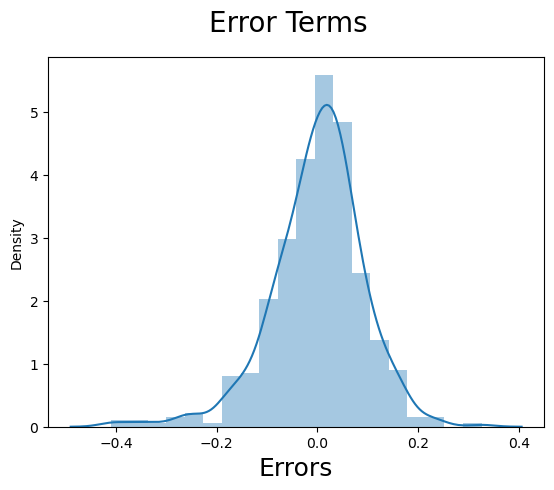

In [746]:
fig=plt.figure()
sns.distplot((res),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

### Observations :
    1. The distributions errors suggests that the linear regression model fits the data well. The errors being normally distributed and centered around zero are indicators of a good fit.
    2. The errors are randomly distributed, which is desired and from the symmetry we can say no bias is not there.
    3. The symmetric spread of the errors implies that the assumption of homoscedasticity holds, meaning the model's predictions have constant variance across different levels of the input variables.

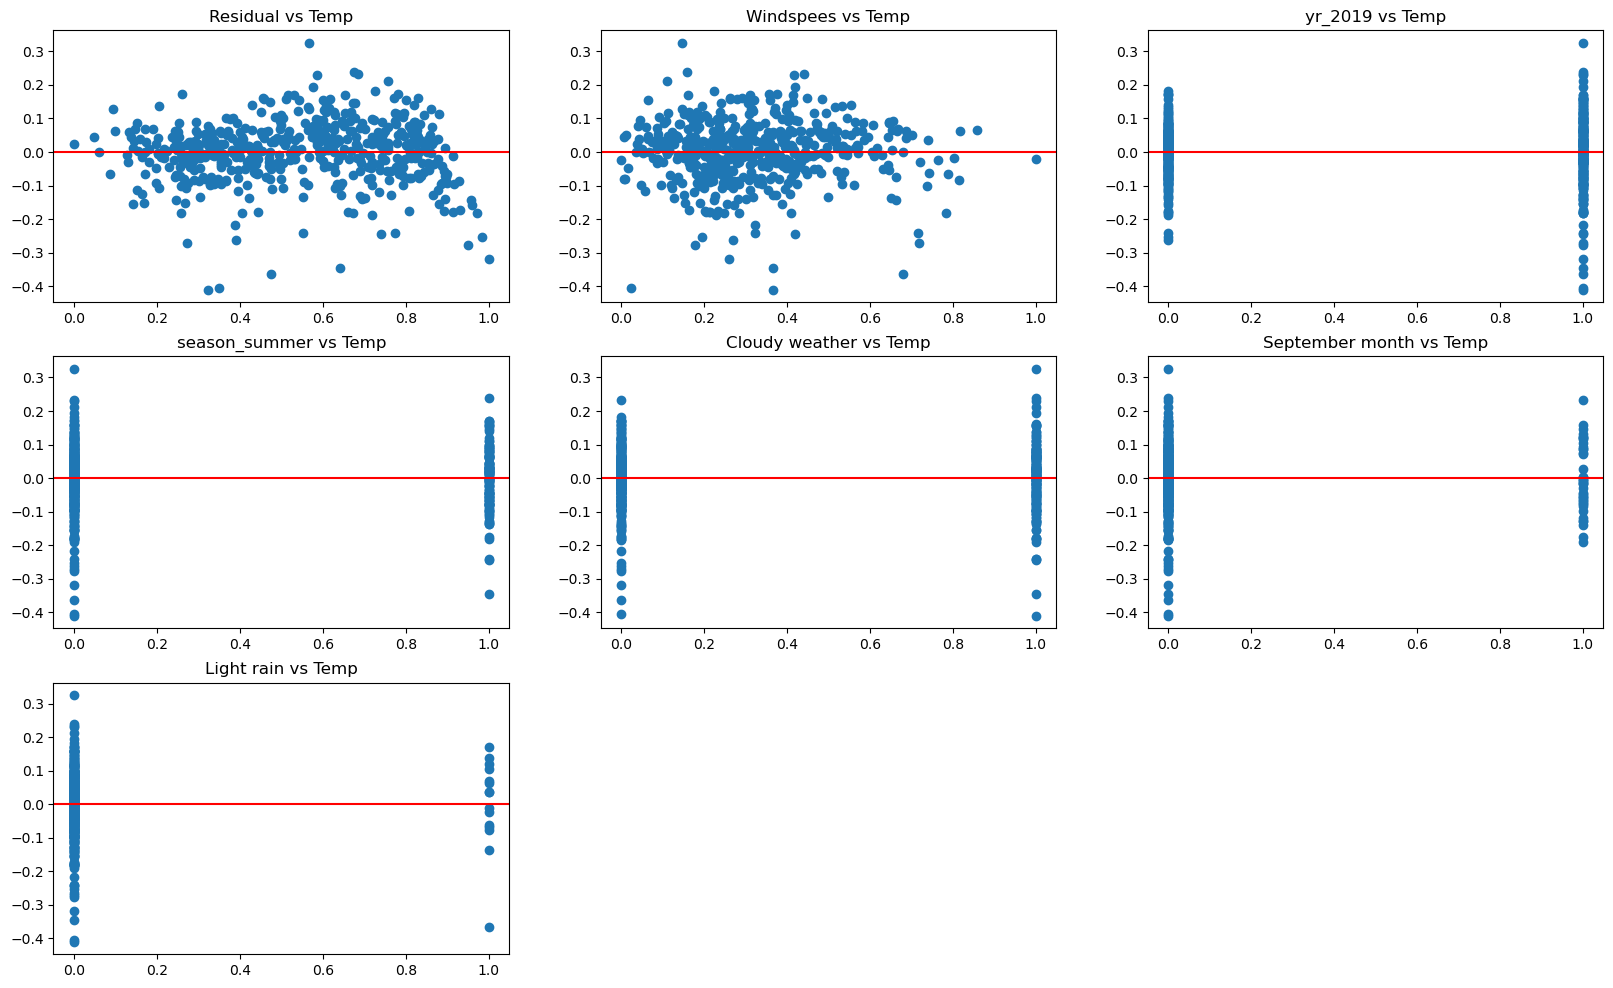

In [748]:
# Scatter Plot for all the residuals.

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
plt.scatter(X_train['temp'],res)
plt.title("Residual vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,2)
plt.scatter(X_train['windspeed'],res)
plt.title("Windspees vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,3)
plt.scatter(X_train['yr_2019'],res)
plt.title("yr_2019 vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,4)
plt.scatter(X_train['season_summer'],res)
plt.title("season_summer vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,5)
plt.scatter(X_train['weathersit_Cloudy'],res)
plt.title("Cloudy weather vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,6)
plt.scatter(X_train['mnth_Sept'],res)
plt.title("September month vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,7)
plt.scatter(X_train['weathersit_Light Rain'],res)
plt.title("Light rain vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

## Prediction on Test setup:

In [750]:
#Transforming the numerical variables 
num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

## Dividing the test set into x_test and y_test


In [752]:
#Splitting df_test into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [753]:
#Adding constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test)

In [754]:
X_test_m5 = X_test_m5.drop(['atemp','hum', 'casual', 'registered','holiday_No Holiday', 'workingday_workingday', 'season_spring','mnth_Aug', 'mnth_Dec', 'mnth_Feb','mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_May','mnth_Nov', 'mnth_Oct','weekday_Mon', 'weekday_Sat','weekday_Sun', 'weekday_Thurs', 'weekday_Tue', 'weekday_Wed'], axis=1,inplace=True)

In [755]:
#Making predictions using the model
y_pred_m5 = lr_25.predict(X_test_m5)

In [756]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [760]:
r2_squared = r2_score(y_train, y_pred_m5)
r2_squared

0.8308173087428185

## Final Equation

Equation of our best fitted line is:

y=0.1285 + 0.5522 * temp − 0.1552 * windspeed + 0.2331 * Year2019 + 0.0892 * summer + 1.48 * cloudy + 0.1297 * winter + 0.0959 * sept − 0.0464 * mon - 0.0786 * cloudy - 0.2785 * light−rain